In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# Data preprocessing

In [201]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [203]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [204]:
##EDA

In [205]:
import mitosheet

In [206]:
mitosheet.sheet(analysis_to_replay="id-btemswixzz")

MitoWidget(analysis_data_json='{"analysisName": "id-fpijvvlcpe", "analysisToReplay": {"analysisName": "id-btem…

In [207]:
from mitosheet import *; register_analysis("id-btemswixzz");
    
# Imported Social_Network_Ads.csv
import pandas as pd
Social_Network_Ads = pd.read_csv(r'Social_Network_Ads.csv')


In [208]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Social_Network_Ads, x='Gender', y='Purchased')
fig.update_layout(
    title='Gender, Purchased bar chart', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [209]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Social_Network_Ads, x='Gender', y='EstimatedSalary', color='Purchased')
fig.update_layout(
    title='Gender, EstimatedSalary bar chart', 
    xaxis = dict(
        showgrid=True, 
        rangeslider = dict(
            visible=True, 
            thickness=0.05
        )
    ), 
    yaxis = dict(
        showgrid=True
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='overlay', 
    paper_bgcolor='#FFFFFF'
)
fig.show(renderer="iframe")

In [210]:
import matplotlib.pyplot as plt

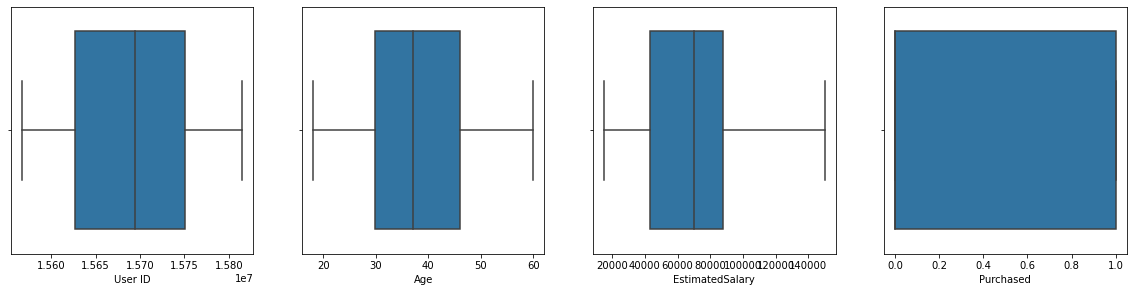

In [211]:
n = 1
plt.figure(figsize=(20,10))
for i in df.describe(include = 'number').columns:
    plt.subplot(2,4,n)
    n+=1
    sns.boxplot(df[i])

<AxesSubplot:xlabel='Purchased', ylabel='count'>

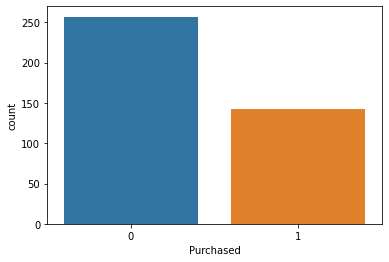

In [212]:
sns.countplot(df.Purchased)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [214]:
n = OrdinalEncoder()

In [215]:
df['Gender']=n.fit_transform(df['Gender'].array.reshape(-1, 1))

In [216]:
#modelling

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    float64
 2   Age              400 non-null    int64  
 3   EstimatedSalary  400 non-null    int64  
 4   Purchased        400 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 15.8 KB


In [218]:
df1 = df.copy()

In [219]:
df1.drop(columns = 'User ID',axis = 1,inplace = True)

In [220]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,19,19000,0
1,1.0,35,20000,0
2,0.0,26,43000,0
3,0.0,27,57000,0
4,1.0,19,76000,0


In [221]:
ss = StandardScaler()

In [222]:
df1[['Age','EstimatedSalary']]=ss.fit_transform(df1[['Age','EstimatedSalary']])

In [223]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.0,-1.781797,-1.490046,0
1,1.0,-0.253587,-1.460681,0
2,0.0,-1.113206,-0.785290,0
3,0.0,-1.017692,-0.374182,0
4,1.0,-1.781797,0.183751,0


In [224]:
df1 = sm.add_constant(df1)

In [225]:
x_train,x_test,y_train,y_test = train_test_split(df1[['const','Gender','Age','EstimatedSalary']],df1['Purchased'],random_state=10,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 4)
(120, 4)
(280,)
(120,)


In [226]:
log_regf = sm.Logit(y_train,x_train).fit()
print(log_regf.summary())

Optimization terminated successfully.
         Current function value: 0.350199
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.4721
Time:                        13:25:15   Log-Likelihood:                -98.056
converged:                       True   LL-Null:                       -185.74
Covariance Type:            nonrobust   LLR p-value:                 8.813e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1341      0.270     -4.193      0.000      -1.664      -0.604
Gender        

In [227]:
y_pred_prob = log_regf.predict(x_test)
y_pred_prob

332    0.495445
111    0.223171
352    0.666077
205    0.574397
56     0.003916
         ...   
17     0.321178
225    0.155368
223    0.996916
59     0.322145
114    0.633002
Length: 120, dtype: float64

In [228]:
# n=1
# plt.figure(figsize=(20,12))
# for i in x_test.columns:
#     plt.subplot(3,2,n)
#     n+=1
#     sns.lineplot(x_test[i],y_pred_prob)

In [229]:
#In built function 

In [230]:
# ll_model = LogisticRegression()
# model1 = ll_model.fit(x_train,y_train)

In [231]:
# y_train_pred = model1.predict(x_train)
# y_train_pred

In [232]:
# y_test_pred = model1.predict(x_test)
# y_test_pred

In [233]:
# n=1
# plt.figure(figsize=(20,12))
# for i in x_test.columns:
#     plt.subplot(3,2,n)
#     n+=1
#     sns.lineplot(x_test[i],y_test_pred)

In [234]:
y_pred = [ 1 if i>0.5 else 0 for i in y_pred_prob]

In [235]:
from sklearn.metrics import confusion_matrix,classification_report,cohen_kappa_score

In [236]:
ss = classification_report(y_test,y_pred)

In [237]:
print(ss)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        83
           1       0.79      0.84      0.82        37

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.89      0.88      0.88       120



In [238]:
kappa = cohen_kappa_score(y_test,y_pred)
print(kappa)

0.7305101058710298


In [239]:
from sklearn.metrics import roc_auc_score

In [240]:
from sklearn.metrics import roc_curve

In [241]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
# #fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# # plot the ROC curve
# plt.plot(fpr, tpr)

# # set limits for x and y axes
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])

# # plot the straight line showing worst prediction for the model
# plt.plot([0, 1], [0, 1],'r--')

# # add plot and axes labels
# # set text size using 'fontsize'
# plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
# plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
# plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# # add the AUC score to the plot
# # 'x' and 'y' gives position of the text
# # 's' is the text 
# # use round() to round-off the AUC score upto 4 digits
# plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))
                               
# # plot the grid
# plt.grid(True)

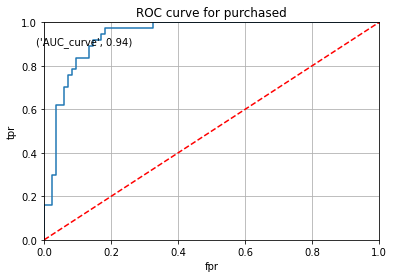

In [242]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--2')

plt.title('ROC curve for purchased')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.text(x=-0.023,y=0.9,s=('AUC_curve',round(roc_auc_score(y_test,y_pred_prob),2)))
plt.grid(True)
plt.show()

In [243]:
roc_auc_score(y_test,y_pred_prob)

0.9394334093129274

In [245]:
cm = confusion_matrix(y_test,y_pred)

In [246]:
print(cm)

[[75  8]
 [ 6 31]]


In [247]:
print(ss)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        83
           1       0.79      0.84      0.82        37

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.87       120
weighted avg       0.89      0.88      0.88       120



In [248]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [249]:
precision = TP/(TP+FP)
precision

0.7948717948717948

In [250]:
recall = TP/(TP+FN)
recall

0.8378378378378378

In [251]:
specificity = TN/(TN+FP)
specificity

0.9036144578313253

In [252]:
f1_score = 2*((precision*recall)/(precision+recall))
f1_score

0.8157894736842105

In [253]:
accuracy = (TP+TN)/(TN+TP+FN+FP)
accuracy

0.8833333333333333

In [254]:
tpr

array([0.        , 0.02702703, 0.16216216, 0.16216216, 0.2972973 ,
       0.2972973 , 0.62162162, 0.62162162, 0.7027027 , 0.7027027 ,
       0.75675676, 0.75675676, 0.78378378, 0.78378378, 0.83783784,
       0.83783784, 0.83783784, 0.89189189, 0.89189189, 0.91891892,
       0.91891892, 0.94594595, 0.94594595, 0.97297297, 0.97297297,
       1.        , 1.        , 1.        , 1.        ])

In [255]:
fpr

array([0.        , 0.        , 0.        , 0.02409639, 0.02409639,
       0.03614458, 0.03614458, 0.06024096, 0.06024096, 0.07228916,
       0.07228916, 0.08433735, 0.08433735, 0.09638554, 0.09638554,
       0.12048193, 0.13253012, 0.13253012, 0.14457831, 0.14457831,
       0.1686747 , 0.1686747 , 0.18072289, 0.18072289, 0.3253012 ,
       0.3253012 , 0.34939759, 0.37349398, 1.        ])

In [300]:
#youdens table

In [256]:
youdel_table = pd.DataFrame({'FPR':fpr,
                             'TPR':tpr,
                             'Threshold':thresholds})
youdel_table['Difference'] = youdel_table.TPR - youdel_table.FPR

youdel_table = youdel_table.sort_values('Difference',ascending = False).reset_index(drop=True)
youdel_table.head()

,FPR,TPR,Threshold,Difference
0,0.180723,0.972973,0.321178,0.792250
1,0.168675,0.945946,0.328130,0.777271
2,0.144578,0.918919,0.350649,0.774341
3,0.180723,0.945946,0.322145,0.765223
4,0.132530,0.891892,0.416141,0.759362


In [258]:
y_pred_youden = [1 if i>0.32 else 0 for i in y_pred_prob]

In [260]:
print(classification_report(y_test,y_pred_youden))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89        83
           1       0.71      0.97      0.82        37

    accuracy                           0.87       120
   macro avg       0.85      0.90      0.86       120
weighted avg       0.90      0.87      0.87       120



In [261]:
confusion_matrix(y_test,y_pred_youden)

array([[68, 15],
       [ 1, 36]], dtype=int64)

In [262]:
kappa = cohen_kappa_score(y_test, y_pred_youden)
print(kappa)

0.7170645446507515


In [263]:
#RFE

In [277]:
x_train_rfe = x_train.iloc[:,1:]
x_test_rfe = x_test.iloc[:,1:]
ll_regression = LogisticRegression()
rfe_model = RFE(estimator = ll_regression,n_features_to_select = 2)
rfe_model = rfe_model.fit(x_train_rfe,y_train)
print(rfe_model.feature_names_in_)
print(rfe_model.ranking_==1)

['Gender' 'Age' 'EstimatedSalary']
[False  True  True]


In [279]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = x_train.iloc[:,1:]
X_test_rfe = x_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 2)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Age', 'EstimatedSalary'], dtype='object')


In [287]:
x_train,x_test,y_train,y_test  = train_test_split(df1[['const','Age','EstimatedSalary']],df1['Purchased'],random_state=10,test_size=0.3)

In [305]:
def get_test_report(model):
    test_pred = model.predict(x_test)
    y_pred_rfe = [0 if i<0.5 else 1 for i in test_pred]
    print(classification_report(y_test,y_pred_rfe))
    print(confusion_matrix(y_test,y_pred_rfe))

In [306]:
model_rfe = sm.Logit(y_train,x_train).fit()
print(model_rfe.summary())


Optimization terminated successfully.
         Current function value: 0.350943
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  280
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Aug 2022   Pseudo R-squ.:                  0.4710
Time:                        14:43:59   Log-Likelihood:                -98.264
converged:                       True   LL-Null:                       -185.74
Covariance Type:            nonrobust   LLR p-value:                 1.022e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0190      0.199     -5.116      0.000      -1.409      -0.629
Age           

In [307]:
get_test_report(model_rfe)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        83
           1       0.79      0.81      0.80        37

    accuracy                           0.88       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.88      0.88      0.88       120

[[75  8]
 [ 7 30]]


In [313]:
test_pred = model_rfe.predict(x_test)
y_pred_rfe = [0 if i<0.5 else 1 for i in test_pred]

In [314]:
print(confusion_matrix(y_test,y_pred_rfe))

[[75  8]
 [ 7 30]]


0.9345490068381634

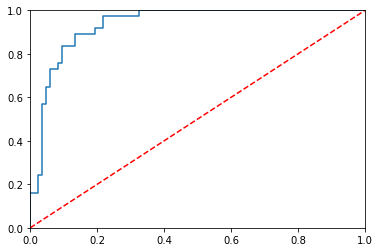

In [323]:
fpr,tpr,threshold = roc_curve(y_test,test_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
roc_auc_score(y_test, test_pred)